In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kritigarg22118038","key":"4ff6dcaaae2afee50f601279182056be"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 24.1MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.1MB/s]


Extraction from ZipFile

In [5]:
from zipfile import ZipFile
file_name="dogs-vs-cats.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [78]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,BatchNormalization,Dropout #These are for incorporating various layers.
#BatchNormalization, Dropout are incorporated to overcome the issue of overfitting.
from keras.regularizers import l1,l2 #to solve overfitting by adding an extra enalty term to the loss function that is proportional to the absolute value/square of weights.

In [7]:
#generators:divide the data into batches
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256) #converting varied size images into same size
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256) #converting varied size images into same size
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Normalizing the data. Since the images have been stored in form of a numpy array which stores values between 0 to 255. We need to convert it between 0 and 1. This is done to obtain the best results.



In [8]:
def process(image,label):
  image=tf.cast(image/255. , tf.float32)
  return image,label

  train_ds=train_ds.map(process)
  validation_ds=validation_ds.map(process)

In [83]:
#Create CNN Model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization()) #to avoid overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4)) #to avoid overfitting
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [84]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_33 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_34 (Ba  (None, 125, 125, 32)      128       
 tchNormalization)                                               
                                                     

In [85]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [86]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 58s 87ms/step - loss: 0.5994 - accuracy: 0.6809 - val_loss: 0.5646 - val_accuracy: 0.6914
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.4636 - accuracy: 0.7800 - val_loss: 0.6320 - val_accuracy: 0.7196
Epoch 3/10
625/625 [==============================] - 53s 85ms/step - loss: 0.3772 - accuracy: 0.8318 - val_loss: 0.3506 - val_accuracy: 0.8454
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.3130 - accuracy: 0.8650 - val_loss: 0.4180 - val_accuracy: 0.8268
Epoch 5/10
625/625 [==============================] - 53s 84ms/step - loss: 0.2607 - accuracy: 0.8903 - val_loss: 0.3421 - val_accuracy: 0.8514
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.2132 - accuracy: 0.9114 - val_loss: 0.3437 - val_accuracy: 0.8660
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1806 - accuracy: 0.9266 - val_loss: 0.2473 - val_accuracy:

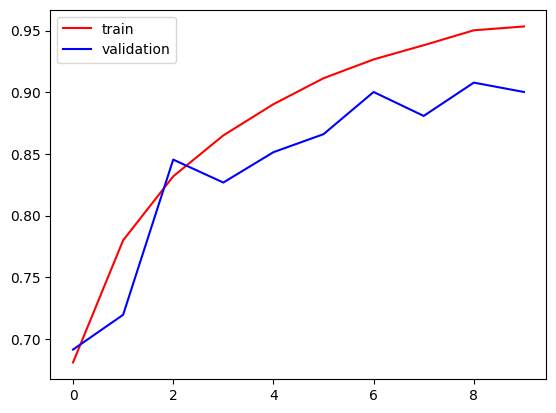

In [87]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

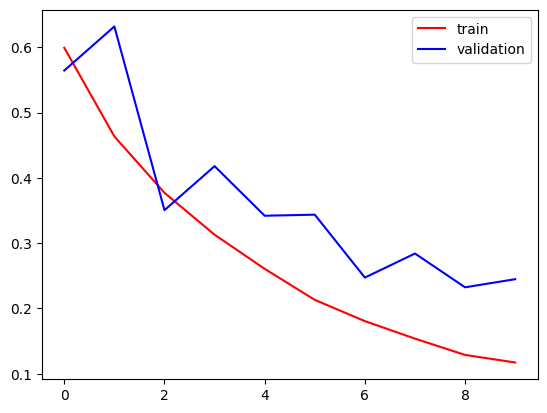

In [88]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

It is noticeable that with increase in epochs, the loss in training data is reducing but the loss in validation data is increasing. This is an indication of Overfitting. To reduce overfiting, we can:
Feed it more data. Can be done through Data Augmentation
L1/L2 Regularization
Adding a Dropout Layer
Adding Batch Normalization

In [89]:
import cv2 #importing OpenCV

In [90]:
test_img=cv2.imread('/content/doggo.jpeg') #test_image now contains a numpy array

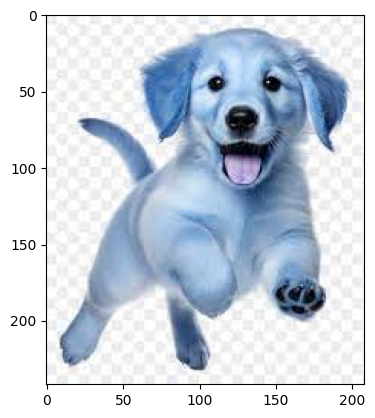

In [91]:
plt.imshow(test_img)   #numpy array plotted using matlotlib.pyplot

In [92]:
test_img.shape

(242, 208, 3)

In [93]:
#resizing the image to 256x256
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape(1,256,256,3) #converting the data into a 4D tensor. There is this one image with its dimensions alongside

In [94]:
model.predict(test_input)

1/1 [==============================] - 0s 135ms/step


array([[0.9992505]], dtype=float32)

In [95]:
test_img=cv2.imread('/content/kitten.jpg') #test_image now contains a numpy array

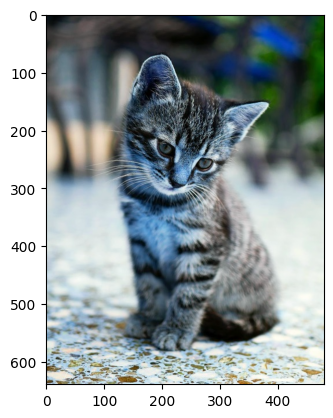

In [96]:
plt.imshow(test_img)

In [97]:
test_img.shape

(639, 480, 3)

In [98]:
#resizing the image to 256x256
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape(1,256,256,3)

In [99]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.06881162]], dtype=float32)